numerical:
1. LotFrontage
2. LotArea
3. OverallQual
4. OverallCond
5. YearBuilt
6. YearRemodAdd
7. MasVnrArea
8. BsmtFinSF1
9. BsmtFinSF2
10. BsmtUnfSF
11. TotalBsmtSF
12. 1stFlrSF
13. 2ndFlrSF
14. LowQualFinSF
15. GrLivArea
16. BsmtFullBath
17. BsmtHalfBath
18. FullBath
19. HalfBath
20. BedroomAbvGr
21. KitchenAbvGr
22. TotRmsAbvGrd
23. Fireplaces
24. GarageYrBlt
25. GarageCars
26. GarageArea
27. WoodDeckSF
28. OpenPorchSF
29. EnclosedPorch
30. 3SsnPorch
31. ScreenPorch
32. PoolArea
33. MiscVal
34. MoSold
35. YrSold

categorical:
    label:
    1. MSZoning
    2. Street
    3. Alley
    4. LotShape
    5. LandContour
    6. Utilities
    7. LotConfig
    8. LandSlope
    9. Condition1
    10. Condition2s
    11. BldgType
    12. HouseStyle
    13. ExterQual
    14. ExterCond
    15. BsmtQual
    16. BsmtCond
    17. BsmtExposure
    18. BsmtFinType1
    19. BsmtFinType2
    20. Heating
    21. HeatingQC
    22. CentralAir
    23. Electrical
    24. KitchenQual
    25. Functional
    26. FireplaceQu
    27. GarageType
    28. GarageFinish
    29. GarageQual
    30. GarageCond
    31. PavedDrive
    32. PoolQC
    33. Fence
    34. MiscFeature
    35. SaleType
    36. SaleCondition

ohe:
31. MSSubClass: type of dwelling
32. Neighbourhood: location
33. RoofStyle
34. RoofMatl
35. Exterior1st
36. Exterior2nd
37. MasVnrType
38. Foundation


In [288]:
numeric_list = ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
'PoolArea','MiscVal','MoSold','YrSold']

In [289]:
ordinal_list = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
'Condition1','Condition2','BldgType','HouseStyle','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature',
'SaleType','SaleCondition']

In [290]:
ohe_list = ['MSSubClass','Neighborhood','RoofStyle','RoofMatl','Exterior1st',
'Exterior2nd','MasVnrType','Foundation']

In [291]:
import pandas as pd
df = pd.read_csv('train.csv')

df_numeric = df[numeric_list]
df_ordinal = df[ordinal_list]
df_ohe = df[ohe_list]
df_all_cat = df[ohe_list + ordinal_list]
y = df['SalePrice']

# data preprocessing

## numeric data

In [292]:
df_numeric.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


imputation: LotFrontage, MasVnrArea, GarageYrBlt
normalisation: OverallQual, OverallCond, YearBuilt, YearRemodAdd, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath,
                BedroomAbvGr,KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, MoSold, YrSold

In [293]:
imputation_list = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
normalisation_list = ['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold']
standardisation_list = df_numeric.drop(columns=normalisation_list).columns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

col = df_numeric.columns
ipt = SimpleImputer(missing_values=np.nan, strategy='median')
df_numeric = ipt.fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, columns=col)

colTransform_numeric = ColumnTransformer([
    ('normalise', MinMaxScaler(), normalisation_list),
    ('standardise', StandardScaler(), standardisation_list)
])

df_numeric_transformed = colTransform_numeric.fit_transform(df_numeric)
df_numeric_transformed = pd.DataFrame(df_numeric_transformed, columns=df_numeric.columns)
df_numeric_transformed.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,0.566591,0.571918,0.719332,0.581096,0.141781,0.028767,0.521689,0.191438,0.358305,0.348858,...,1.920268e-16,-1.446332e-16,-2.022735e-17,2.190029e-16,3.357284e-17,1.379034e-16,-4.005738e-16,1.199193e-16,-7.945889e-16,2.409602e-16
std,0.153666,0.139100,0.218862,0.344090,0.172970,0.119376,0.183639,0.251443,0.101972,0.073446,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.202417e-01,-2.249120e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
25%,0.444444,0.500000,0.594203,0.283333,0.000000,0.000000,0.333333,0.000000,0.250000,0.333333,...,-1.202417e-01,-7.347485e-01,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
50%,0.555556,0.500000,0.731884,0.733333,0.000000,0.000000,0.666667,0.000000,0.375000,0.333333,...,-1.202417e-01,-9.797004e-02,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
75%,0.666667,0.625000,0.927536,0.900000,0.333333,0.000000,0.666667,0.500000,0.375000,0.333333,...,-1.202417e-01,4.974036e-01,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.164775e+01,7.855574e+00,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01


## categorical encoding
one-hot and ordinal encoding

### ordinal encoding for ordered features

In [294]:
df_ordinal.replace(np.nan, 'NA', inplace=True)

In [295]:
from sklearn.preprocessing import OrdinalEncoder

df_ordinal_transformed = OrdinalEncoder().fit_transform(df_ordinal)
df_ordinal_transformed = pd.DataFrame(df_ordinal_transformed,columns=df_ordinal.columns)
df_ordinal_transformed.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,...,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,0.0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,2.0,...,1.0,2.0,5.0,5.0,2.0,3.0,4.0,1.0,8.0,4.0


### one hot encoding

In [296]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   int64 
 1   Neighborhood  1460 non-null   object
 2   RoofStyle     1460 non-null   object
 3   RoofMatl      1460 non-null   object
 4   Exterior1st   1460 non-null   object
 5   Exterior2nd   1460 non-null   object
 6   MasVnrType    1452 non-null   object
 7   Foundation    1460 non-null   object
dtypes: int64(1), object(7)
memory usage: 91.4+ KB


In [297]:
df_ohe['MasVnrType'].replace(np.nan, 'None', inplace=True) # impute NaN
df_ohe['MSSubClass'] = df_ohe['MSSubClass'].astype(str) # numerical to string category

df_ohe_transformed = pd.get_dummies(df_ohe)
df_ohe_transformed.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [298]:
df_categorical_transformed = pd.concat([df_ordinal_transformed, df_ohe_transformed], axis=1)
df_categorical_transformed

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,0,1,0,0,0,0,1,0,0,0
1,3.0,1.0,1.0,3.0,3.0,0.0,2.0,0.0,1.0,2.0,...,0,0,1,0,0,1,0,0,0,0
2,3.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,...,0,1,0,0,0,0,1,0,0,0
3,3.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,...,0,0,1,0,1,0,0,0,0,0
4,3.0,1.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,2.0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,0
1456,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,0,0,0,1,0,1,0,0,0,0
1457,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,0,0,1,0,0,0,0,0,1,0
1458,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,0,0,1,0,0,1,0,0,0,0


In [299]:
df_transformed = pd.concat([y, df_numeric_transformed, df_categorical_transformed], axis=1)

In [300]:
corr_matrix = df_transformed.corr()['SalePrice'].sort_values(ascending=False)
corr_matrix

SalePrice       1.000000
LotFrontage     0.790982
WoodDeckSF      0.708624
LowQualFinSF    0.640409
OpenPorchSF     0.623431
                  ...   
GarageType     -0.415283
GarageFinish   -0.425684
KitchenQual    -0.589189
BsmtQual       -0.593734
ExterQual      -0.636884
Name: SalePrice, Length: 167, dtype: float64

<AxesSubplot:xlabel='correlation', ylabel='Frequency'>

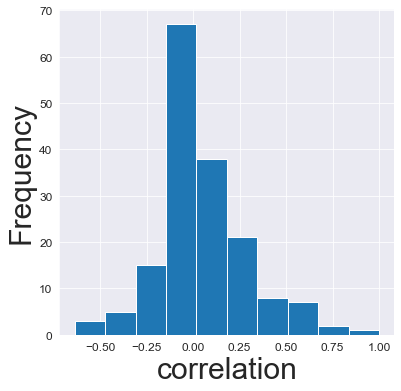

In [301]:
import matplotlib.pyplot as plt

plt.xlabel('correlation', fontsize=30)
plt.ylabel('frequency', fontsize=30)
plt.tick_params(axis='both', labelsize=12)
corr_matrix.plot.hist(figsize=(6,6))

# test set transformation

In [302]:
test = pd.read_csv('test.csv')

In [303]:
test_numeric = test[numeric_list]
test_ordinal = test[ordinal_list]
test_ohe = test[ohe_list]

## test numeric

In [304]:
col = test_numeric.columns
test_numeric = ipt.fit_transform(test_numeric)
test_numeric = pd.DataFrame(test_numeric, columns=col)

test_numeric_transformed = colTransform_numeric.fit_transform(test_numeric)
test_numeric_transformed = pd.DataFrame(test_numeric_transformed, columns=test_numeric.columns)
test_numeric_transformed

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.444444,0.625,0.625954,0.183333,0.000000,0.0,0.25,0.0,0.333333,0.5,...,-0.080483,-1.215588,1.185921,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244
1,0.555556,0.625,0.603053,0.133333,0.000000,0.0,0.25,0.5,0.500000,0.5,...,-0.080483,-0.323539,-0.741235,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438
2,0.444444,0.500,0.900763,0.800000,0.000000,0.0,0.50,0.5,0.500000,0.5,...,-0.080483,0.294508,0.042537,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244
3,0.555556,0.625,0.908397,0.800000,0.000000,0.0,0.50,0.5,0.500000,0.5,...,-0.080483,0.243004,-0.012788,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244
4,0.777778,0.500,0.862595,0.700000,0.000000,0.0,0.50,0.0,0.333333,0.5,...,-0.080483,-0.424487,0.153187,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.333333,0.750,0.694656,0.333333,0.000000,0.0,0.25,0.5,0.500000,0.5,...,-0.080483,-0.811797,-2.179687,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244
1455,0.333333,0.500,0.694656,0.333333,0.000000,0.0,0.25,0.5,0.500000,0.5,...,-0.080483,-0.811797,-0.861106,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244
1456,0.444444,0.750,0.618321,0.766667,0.333333,0.0,0.25,0.0,0.666667,0.5,...,-0.080483,-0.539856,0.475916,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244
1457,0.444444,0.500,0.862595,0.700000,0.000000,0.5,0.25,0.0,0.500000,0.5,...,-0.080483,-1.063136,-2.179687,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827


In [305]:
test_numeric.columns == df_numeric_transformed.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

## test ordinal

In [306]:
test_ordinal.replace(np.nan, 'NA', inplace=True)

test_ordinal_transformed = OrdinalEncoder().fit_transform(test_ordinal)
test_ordinal_transformed = pd.DataFrame(test_ordinal_transformed, columns=test_ordinal.columns)
test_ordinal_transformed

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,1.0,2.0,...,1.0,3.0,4.0,5.0,2.0,2.0,2.0,1.0,9.0,4.0
1,4.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,2.0,...,1.0,3.0,4.0,5.0,2.0,2.0,4.0,0.0,9.0,4.0
2,4.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,...,1.0,0.0,4.0,5.0,2.0,2.0,2.0,1.0,9.0,4.0
3,4.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,...,1.0,0.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,4.0
4,4.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,2.0,2.0,...,1.0,2.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,6.0,1.0,2.0,3.0,2.0,2.0,4.0,1.0,9.0,4.0
1455,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,4.0,3.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,0.0
1456,4.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,5.0,3.0,4.0,5.0,2.0,2.0,4.0,1.0,9.0,0.0
1457,4.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,2.0,2.0,...,6.0,1.0,2.0,3.0,2.0,2.0,2.0,3.0,9.0,4.0


In [307]:
test_ordinal_transformed.columns == df_ordinal_transformed.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## test ohe

In [308]:
test_ohe['MasVnrType'].replace(np.nan, 'None', inplace=True)  # impute NaN
test_ohe['MSSubClass'] = test_ohe['MSSubClass'].astype(str)  # numerical to string category

test_ohe_transformed = pd.get_dummies(test_ohe)
test_ohe_transformed

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1455,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1456,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [309]:
df_ohe_transformed

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1456,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1457,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1458,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [310]:
dfcol = df_ohe_transformed.columns
testcol = test_ohe_transformed.columns

df_unique = []
test_unique = []

for i in dfcol:
    if i not in testcol:
        df_unique.append(i)
for j in testcol:
    if j not in dfcol:
        test_unique.append(j)


print(f'df_unique: {df_unique}')
print(f'test_unique: {test_unique}')


df_unique: ['RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other']
test_unique: ['MSSubClass_150']


In [311]:
df_transformed.drop(columns=['RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other'], inplace=True)

test_ohe_transformed.drop(columns='MSSubClass_150', inplace=True)

In [312]:
test_categorical_transformed = pd.concat([test_ordinal_transformed, test_ohe_transformed], axis=1)
test_transformed = pd.concat([test_numeric_transformed, test_categorical_transformed], axis=1)

test_transformed

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,0.444444,0.625,0.625954,0.183333,0.000000,0.0,0.25,0.0,0.333333,0.5,...,0,0,1,0,0,1,0,0,0,0
1,0.555556,0.625,0.603053,0.133333,0.000000,0.0,0.25,0.5,0.500000,0.5,...,0,1,0,0,0,1,0,0,0,0
2,0.444444,0.500,0.900763,0.800000,0.000000,0.0,0.50,0.5,0.500000,0.5,...,0,0,1,0,0,0,1,0,0,0
3,0.555556,0.625,0.908397,0.800000,0.000000,0.0,0.50,0.5,0.500000,0.5,...,0,1,0,0,0,0,1,0,0,0
4,0.777778,0.500,0.862595,0.700000,0.000000,0.0,0.50,0.0,0.333333,0.5,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.333333,0.750,0.694656,0.333333,0.000000,0.0,0.25,0.5,0.500000,0.5,...,0,0,1,0,0,1,0,0,0,0
1455,0.333333,0.500,0.694656,0.333333,0.000000,0.0,0.25,0.5,0.500000,0.5,...,0,0,1,0,0,1,0,0,0,0
1456,0.444444,0.750,0.618321,0.766667,0.333333,0.0,0.25,0.0,0.666667,0.5,...,0,0,1,0,0,1,0,0,0,0
1457,0.444444,0.500,0.862595,0.700000,0.000000,0.5,0.25,0.0,0.500000,0.5,...,0,0,1,0,0,0,1,0,0,0


In [313]:
df_transformed

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,208500,0.666667,0.500,0.949275,0.883333,0.333333,0.0,0.666667,0.5,0.375,...,0,1,0,0,0,0,1,0,0,0
1,181500,0.555556,0.875,0.753623,0.433333,0.000000,0.5,0.666667,0.0,0.375,...,0,0,1,0,0,1,0,0,0,0
2,223500,0.666667,0.500,0.934783,0.866667,0.333333,0.0,0.666667,0.5,0.375,...,0,1,0,0,0,0,1,0,0,0
3,140000,0.666667,0.500,0.311594,0.333333,0.333333,0.0,0.333333,0.0,0.375,...,0,0,1,0,1,0,0,0,0,0
4,250000,0.777778,0.500,0.927536,0.833333,0.333333,0.0,0.666667,0.5,0.500,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,0.555556,0.500,0.920290,0.833333,0.000000,0.0,0.666667,0.5,0.375,...,0,0,1,0,0,0,1,0,0,0
1456,210000,0.555556,0.625,0.768116,0.633333,0.333333,0.0,0.666667,0.0,0.375,...,0,0,0,1,0,1,0,0,0,0
1457,266500,0.666667,1.000,0.500000,0.933333,0.000000,0.0,0.666667,0.0,0.500,...,0,0,1,0,0,0,0,0,1,0
1458,142125,0.444444,0.625,0.565217,0.766667,0.333333,0.0,0.333333,0.0,0.250,...,0,0,1,0,0,1,0,0,0,0


In [314]:
train_cols = df_transformed.drop(columns='SalePrice').columns

test_transformed = test_transformed.reindex(columns=train_cols)

In [315]:
test_transformed.columns == df_transformed.drop(columns='SalePrice').columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

# outlier detection

<AxesSubplot:>

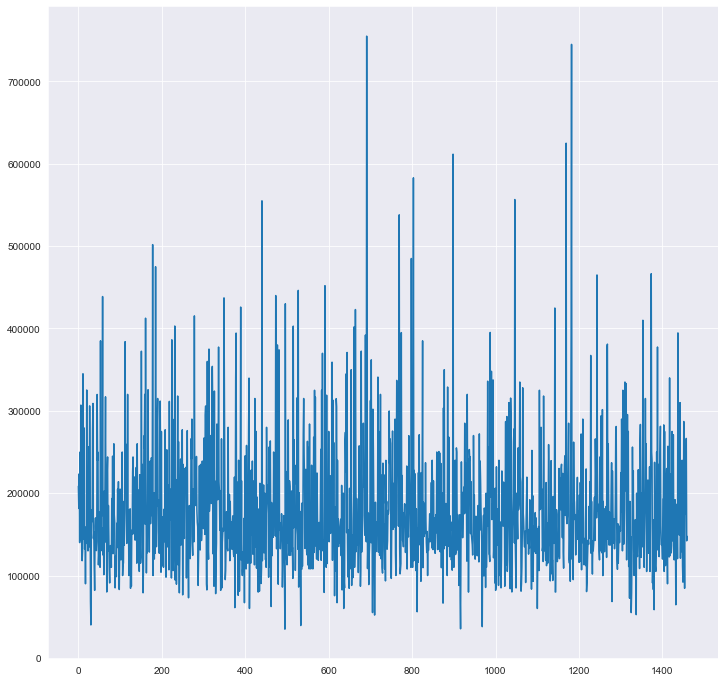

In [316]:
plt.figure(figsize=(12,12))
df_transformed['SalePrice'].plot()

Sale price greater than 500000 is pretty suspicious

<AxesSubplot:>

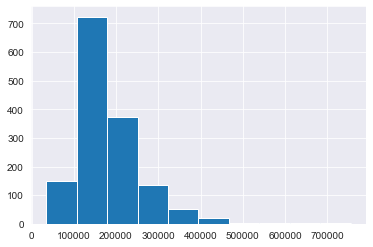

In [317]:
df_transformed['SalePrice'].hist()

In [318]:
df_transformed[df_transformed['SalePrice'] > 500000]

,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
178,501837,0.888889,0.500,0.985507,0.983333,0.333333,0.0,0.666667,0.0,0.125,...,0,0,0,1,0,0,1,0,0,0
440,555000,1.000000,0.500,0.985507,0.966667,0.333333,0.0,0.666667,0.0,0.250,...,0,0,0,1,0,0,1,0,0,0
691,755000,1.000000,0.625,0.884058,0.750000,0.000000,0.5,1.000000,0.5,0.500,...,0,1,0,0,0,0,1,0,0,0
769,538000,0.777778,0.500,0.949275,0.883333,0.333333,0.0,1.000000,0.5,0.500,...,0,1,0,0,0,0,1,0,0,0
803,582933,0.888889,0.500,0.985507,0.983333,0.000000,0.0,1.000000,0.5,0.500,...,0,0,0,1,0,0,1,0,0,0
898,611657,0.888889,0.500,0.992754,1.000000,0.333333,0.0,0.666667,0.5,0.250,...,0,0,0,1,0,0,1,0,0,0
1046,556581,0.888889,0.500,0.963768,0.933333,0.000000,0.0,1.000000,0.5,0.500,...,0,0,0,1,0,0,1,0,0,0
1169,625000,1.000000,0.500,0.891304,0.766667,0.333333,0.0,1.000000,0.5,0.500,...,0,1,0,0,0,0,1,0,0,0
1182,745000,1.000000,0.500,0.898551,0.766667,0.333333,0.0,1.000000,0.5,0.500,...,0,0,1,0,0,0,1,0,0,0


In [319]:
df_transformed.drop(df_transformed[df_transformed['SalePrice'] > 500000].index, inplace=True)
len(df_transformed)

1451

<AxesSubplot:>

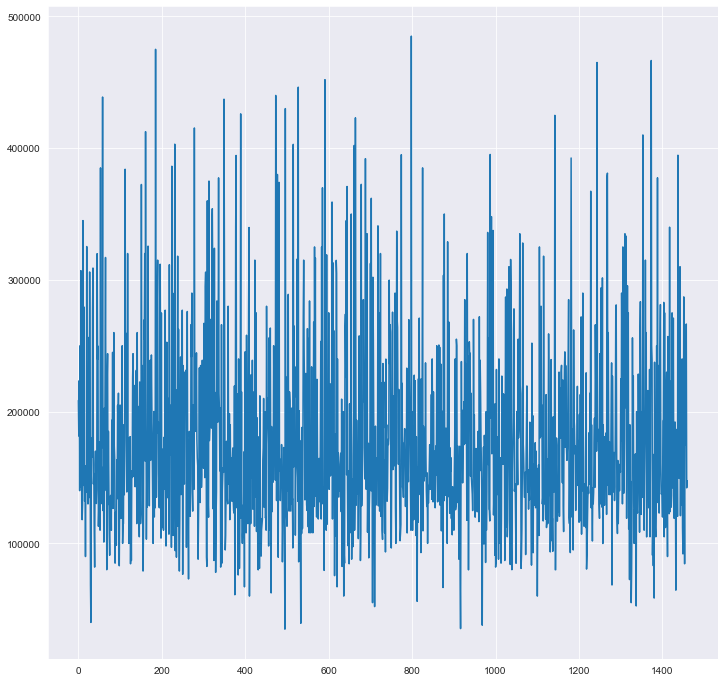

In [320]:
plt.figure(figsize=(12,12))
df_transformed['SalePrice'].plot()

# val train split

In [321]:
x = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']

<AxesSubplot:>

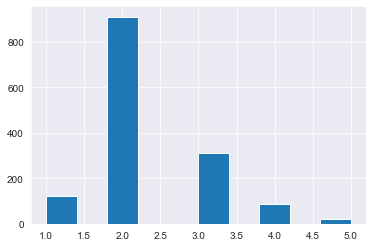

In [322]:
import numpy as np
df_transformed['SalePriceCat'] = pd.cut(df['SalePrice'],
                                        bins=[0, 100000,200000, 300000, 400000, np.inf],
                                        labels=[1,2,3,4,5])

df_transformed['SalePriceCat'].hist()

<AxesSubplot:>

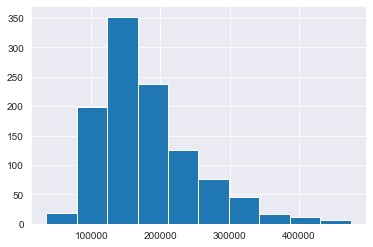

In [323]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=42,
                                                  stratify=df_transformed['SalePriceCat'], test_size=0.25)
df_transformed.drop(columns='SalePriceCat', inplace=True)
y_train.hist()

# evaluation metrics

In [324]:
def evaluate(model, model_name, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    val_error_percent = (y_pred -y_test) / y_test
    train_error_percent = (y_pred_train - y_train) / y_train

    train_mae_percent = train_error_percent.abs().mean()
    val_mae_percent = val_error_percent.abs().mean()

    print(f'mae percentage of {model_name} (train): {train_mae_percent}')
    print(f'mae percentage of {model_name} (test): {val_mae_percent}')

# models for ensemble learning

## model 1 elastic net

In [325]:
from sklearn.linear_model import ElasticNet
# from sklearn.model_selection import GridSearchCV
#
# param_grid={
#     'l1_ratio': list(x * 0.1 for x in range(1,10)),
#     'alpha': list(x * 0.1 for x in range(5, 15))
# }
#
# gs_elastic = GridSearchCV(ElasticNet(), param_grid, cv=5, scoring='neg_mean_absolute_error')
# gs_elastic.fit(x_train, y_train)
# print(gs_elastic.best_params_)

from grid search, best params are alpha=0.5, l1_ratio=0.9

In [326]:
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.9)
evaluate(elastic_net,'elastic_net', x_train, y_train, x_val, y_val)

mae percentage of elastic_net (train): 0.09796045642421118
mae percentage of elastic_net (test): 0.1215053425814325


## model 2 SVR

In [327]:
# from sklearn.utils._testing import ignore_warnings
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
#
# with ignore_warnings(category=[ConvergenceWarning, FitFailedWarning]):
#     param_grid={
#         'kernel': ['poly', 'rbf', 'linear'],
#         'degree': list(range(1,4)),
#         'C': list(0.1 * x for x in range(5, 15)),
#         'epsilon': list(0.1 * x for x in range(10, 20))
#     }
#
#     gs_svr = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_absolute_error')
#     gs_svr.fit(x_train, y_train)
#
# print(gs_svr.best_params_)

from grid search, 'C': 1.4000000000000001, 'degree': 1, 'epsilon': 1.0, 'kernel': 'linear'

In [328]:
from sklearn.svm import SVR

svr_lin = SVR(kernel='linear', degree=1, epsilon=1, C=1.4)
evaluate(svr_lin,'svr_lin', x_train, y_train, x_val, y_val)

mae percentage of svr_lin (train): 0.26376177917968
mae percentage of svr_lin (test): 0.2781522573079606


## model 3 random forest

In [329]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV
#
# param_grid={
#     'n_estimators': list(range(100, 1000, 100)),
#     'max_features': ['auto', 'sqrt', 'log2', 'None'],
#     'max_depth': [20,40,60,80,100,120,140,150,'None'],
#     'min_samples_split': list(range(10, 110, 20))
# }
#
# gs_rdf = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42, verbose=True), param_grid, cv=5, scoring='neg_mean_absolute_error')
# gs_rdf.fit(x_train, y_train)
# print(gs_rdf.best_params_)

from grid search: 'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 700

In [330]:
from sklearn.ensemble import RandomForestRegressor

rdf = RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=10, n_estimators=700)
evaluate(rdf,'random forest', x_train, y_train, x_val, y_val)

mae percentage of random forest (train): 0.05108110518870803
mae percentage of random forest (test): 0.11559677022184982


## modle 4 XGBoost

In [331]:
from xgboost.sklearn import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train, early_stopping_rounds=5, eval_metric='mape', eval_set=[(x_val, y_val)])

[0]	validation_0-mape:0.69311
[1]	validation_0-mape:0.48254
[2]	validation_0-mape:0.33687
[3]	validation_0-mape:0.24479
[4]	validation_0-mape:0.18606
[5]	validation_0-mape:0.15044
[6]	validation_0-mape:0.12928
[7]	validation_0-mape:0.11721
[8]	validation_0-mape:0.11136
[9]	validation_0-mape:0.10816
[10]	validation_0-mape:0.10662
[11]	validation_0-mape:0.10564
[12]	validation_0-mape:0.10552
[13]	validation_0-mape:0.10473
[14]	validation_0-mape:0.10439
[15]	validation_0-mape:0.10377
[16]	validation_0-mape:0.10325
[17]	validation_0-mape:0.10325
[18]	validation_0-mape:0.10284
[19]	validation_0-mape:0.10297
[20]	validation_0-mape:0.10268
[21]	validation_0-mape:0.10276
[22]	validation_0-mape:0.10258
[23]	validation_0-mape:0.10294
[24]	validation_0-mape:0.10286
[25]	validation_0-mape:0.10272
[26]	validation_0-mape:0.10295


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Summary: Validation error (mean absolute error percentage) of 4 models:
1. Elastic net: 0.1215047390077148
2. SVR: 0.2781522573079606
3. Random forest: 0.11568737413642427
4. XGBoost: 0.10268

# stacking

In [332]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('elastic_net', elastic_net),
    ('xgb', XGBRegressor(n_estimators = 20))
]

stacked_reg = StackingRegressor(
    estimators = estimators,
    final_estimator=rdf
)

stacked_reg.fit(x_train, y_train)
evaluate(stacked_reg,'stacked_reg', x_train, y_train, x_val, y_val)

mae percentage of stacked_reg (train): 0.060027280429970055
mae percentage of stacked_reg (test): 0.09973253284410966


# make prediction

In [333]:
test_pred = stacked_reg.predict(test_transformed)

In [334]:
test_pred = pd.DataFrame({'id': list(range(1461, 1461+len(test_pred))), 'SalePrice': test_pred})
test_pred.set_index('id', inplace=True)
test_pred.to_csv('submission.csv')